In [1]:
%matplotlib inline
from typing import List, Callable
import pandas as pd
from sklearn.cluster import (KMeans, DBSCAN, Birch)
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import Isomap
from sklearn.metrics import silhouette_score
from numpy.random import rand
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import (Arc, Ellipse)
from pandas.plotting import parallel_coordinates
from tqdm import tqdm

In [2]:
# datafile= 'data/preprocesseddata.xls'
datafile= 'data/players_dataset.csv'
# datafile = 'data/flights.csv'
cleanedfile = 'data/data_cleaned.csv'

## Exercise 0: Data Exploration and Data Cleaning

In [3]:
data = pd.read_csv(datafile, sep=';')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9012 entries, 0 to 9011
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   overall_rating                 9012 non-null   int64  
 1   potential                      9012 non-null   int64  
 2   value_euro                     8861 non-null   float64
 3   wage_euro                      8864 non-null   float64
 4   international_reputation(1-5)  9012 non-null   int64  
 5   weak_foot(1-5)                 9012 non-null   int64  
 6   skill_moves(1-5)               9012 non-null   int64  
 7   release_clause_euro            7963 non-null   float64
 8   crossing                       9012 non-null   int64  
 9   finishing                      9012 non-null   int64  
 10  heading_accuracy               9012 non-null   int64  
 11  short_passing                  9012 non-null   int64  
 12  volleys                        9012 non-null   i

In [5]:
missing = data.shape[0] - data.count()
print(missing[missing != 0])

value_euro              151
wage_euro               148
release_clause_euro    1049
dtype: int64


In [6]:
data.head()

,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),release_clause_euro,crossing,finishing,...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
0,94,94,110500000.0,565000.0,5,4,4,226500000.0,86,95,...,75,96,33,28,26,6,11,15,14,8
1,88,89,69500000.0,205000.0,3,5,4,133800000.0,88,81,...,67,88,59,57,22,9,14,7,7,6
2,88,91,73000000.0,255000.0,4,4,5,144200000.0,80,75,...,82,87,63,67,67,5,6,2,4,3
3,88,88,62000000.0,165000.0,3,4,4,105400000.0,86,77,...,61,83,51,24,22,8,4,14,9,10
4,63,77,800000.0,3000.0,1,2,3,2100000.0,53,50,...,60,61,41,40,47,10,13,8,11,14


In [7]:
data.describe(include = 'all')

,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),release_clause_euro,crossing,finishing,...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,9012.000000,9012.000000,8.861000e+03,8864.000000,9012.000000,9012.000000,9012.000000,7.963000e+03,9012.000000,9012.000000,...,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.00000,9012.000000,9012.000000,9012.000000,9012.000000
mean,69.770750,73.046383,3.445543e+06,13489.959386,1.160009,3.018309,2.530737,6.528110e+06,53.764425,48.761318,...,51.092876,63.087106,50.581225,50.958833,48.581225,16.27308,16.059587,15.902241,16.148580,16.391811
std,4.849281,5.608650,6.490245e+06,25741.310005,0.462231,0.676178,0.779871,1.303581e+07,18.145795,19.470067,...,15.537202,9.691299,20.072960,21.906186,21.710481,17.84360,17.027461,16.564563,17.390257,18.199737
min,59.000000,63.000000,2.000000e+04,1000.000000,1.000000,1.000000,1.000000,3.800000e+04,5.000000,2.000000,...,9.000000,12.000000,3.000000,6.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,66.000000,69.000000,6.750000e+05,3000.000000,1.000000,3.000000,2.000000,1.100000e+06,44.000000,33.000000,...,41.000000,58.000000,32.000000,30.000000,27.000000,8.00000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,72.000000,1.200000e+06,6000.000000,1.000000,3.000000,3.000000,2.000000e+06,59.000000,53.000000,...,53.000000,64.000000,58.000000,61.000000,58.000000,11.00000,11.000000,11.000000,11.000000,11.000000
75%,73.000000,77.000000,3.600000e+06,14000.000000,1.000000,3.000000,3.000000,6.400000e+06,67.000000,65.000000,...,63.000000,69.000000,67.000000,69.000000,67.000000,14.00000,14.000000,14.000000,14.000000,14.000000
max,94.000000,94.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,2.265000e+08,93.000000,95.000000,...,91.000000,96.000000,94.000000,93.000000,90.000000,90.00000,92.000000,92.000000,90.000000,94.000000


In [8]:
explore = data.describe(percentiles = [], include = 'all', datetime_is_numeric=True).T
explore['null'] = len(data)-explore['count']

In [9]:
explore = explore[['null','max','min', 'count']]
explore

,null,max,min,count
overall_rating,0.0,94.0,59.0,9012.0
potential,0.0,94.0,63.0,9012.0
value_euro,151.0,110500000.0,20000.0,8861.0
wage_euro,148.0,565000.0,1000.0,8864.0
international_reputation(1-5),0.0,5.0,1.0,9012.0
weak_foot(1-5),0.0,5.0,1.0,9012.0
skill_moves(1-5),0.0,5.0,1.0,9012.0
release_clause_euro,1049.0,226500000.0,38000.0,7963.0
crossing,0.0,93.0,5.0,9012.0
finishing,0.0,95.0,2.0,9012.0


In [10]:
data = data[data['value_euro'].notnull()&data['wage_euro'].notnull()&data['release_clause_euro'].notnull()]

Make indices for filtering ...

In [11]:
# index1 = data['value_euro'] != 0

In [12]:
# index2 = data['wage_euro'] != 0

In [13]:
# index3 = data['release_clause_euro'] != 0

In [14]:
# data = data[index1 | index2 | index3]

array([[<AxesSubplot:title={'center':'overall_rating'}>,
        <AxesSubplot:title={'center':'potential'}>,
        <AxesSubplot:title={'center':'value_euro'}>,
        <AxesSubplot:title={'center':'wage_euro'}>,
        <AxesSubplot:title={'center':'international_reputation(1-5)'}>,
        <AxesSubplot:title={'center':'weak_foot(1-5)'}>],
       [<AxesSubplot:title={'center':'skill_moves(1-5)'}>,
        <AxesSubplot:title={'center':'release_clause_euro'}>,
        <AxesSubplot:title={'center':'crossing'}>,
        <AxesSubplot:title={'center':'finishing'}>,
        <AxesSubplot:title={'center':'heading_accuracy'}>,
        <AxesSubplot:title={'center':'short_passing'}>],
       [<AxesSubplot:title={'center':'volleys'}>,
        <AxesSubplot:title={'center':'dribbling'}>,
        <AxesSubplot:title={'center':'curve'}>,
        <AxesSubplot:title={'center':'freekick_accuracy'}>,
        <AxesSubplot:title={'center':'long_passing'}>,
        <AxesSubplot:title={'center':'ball_control'

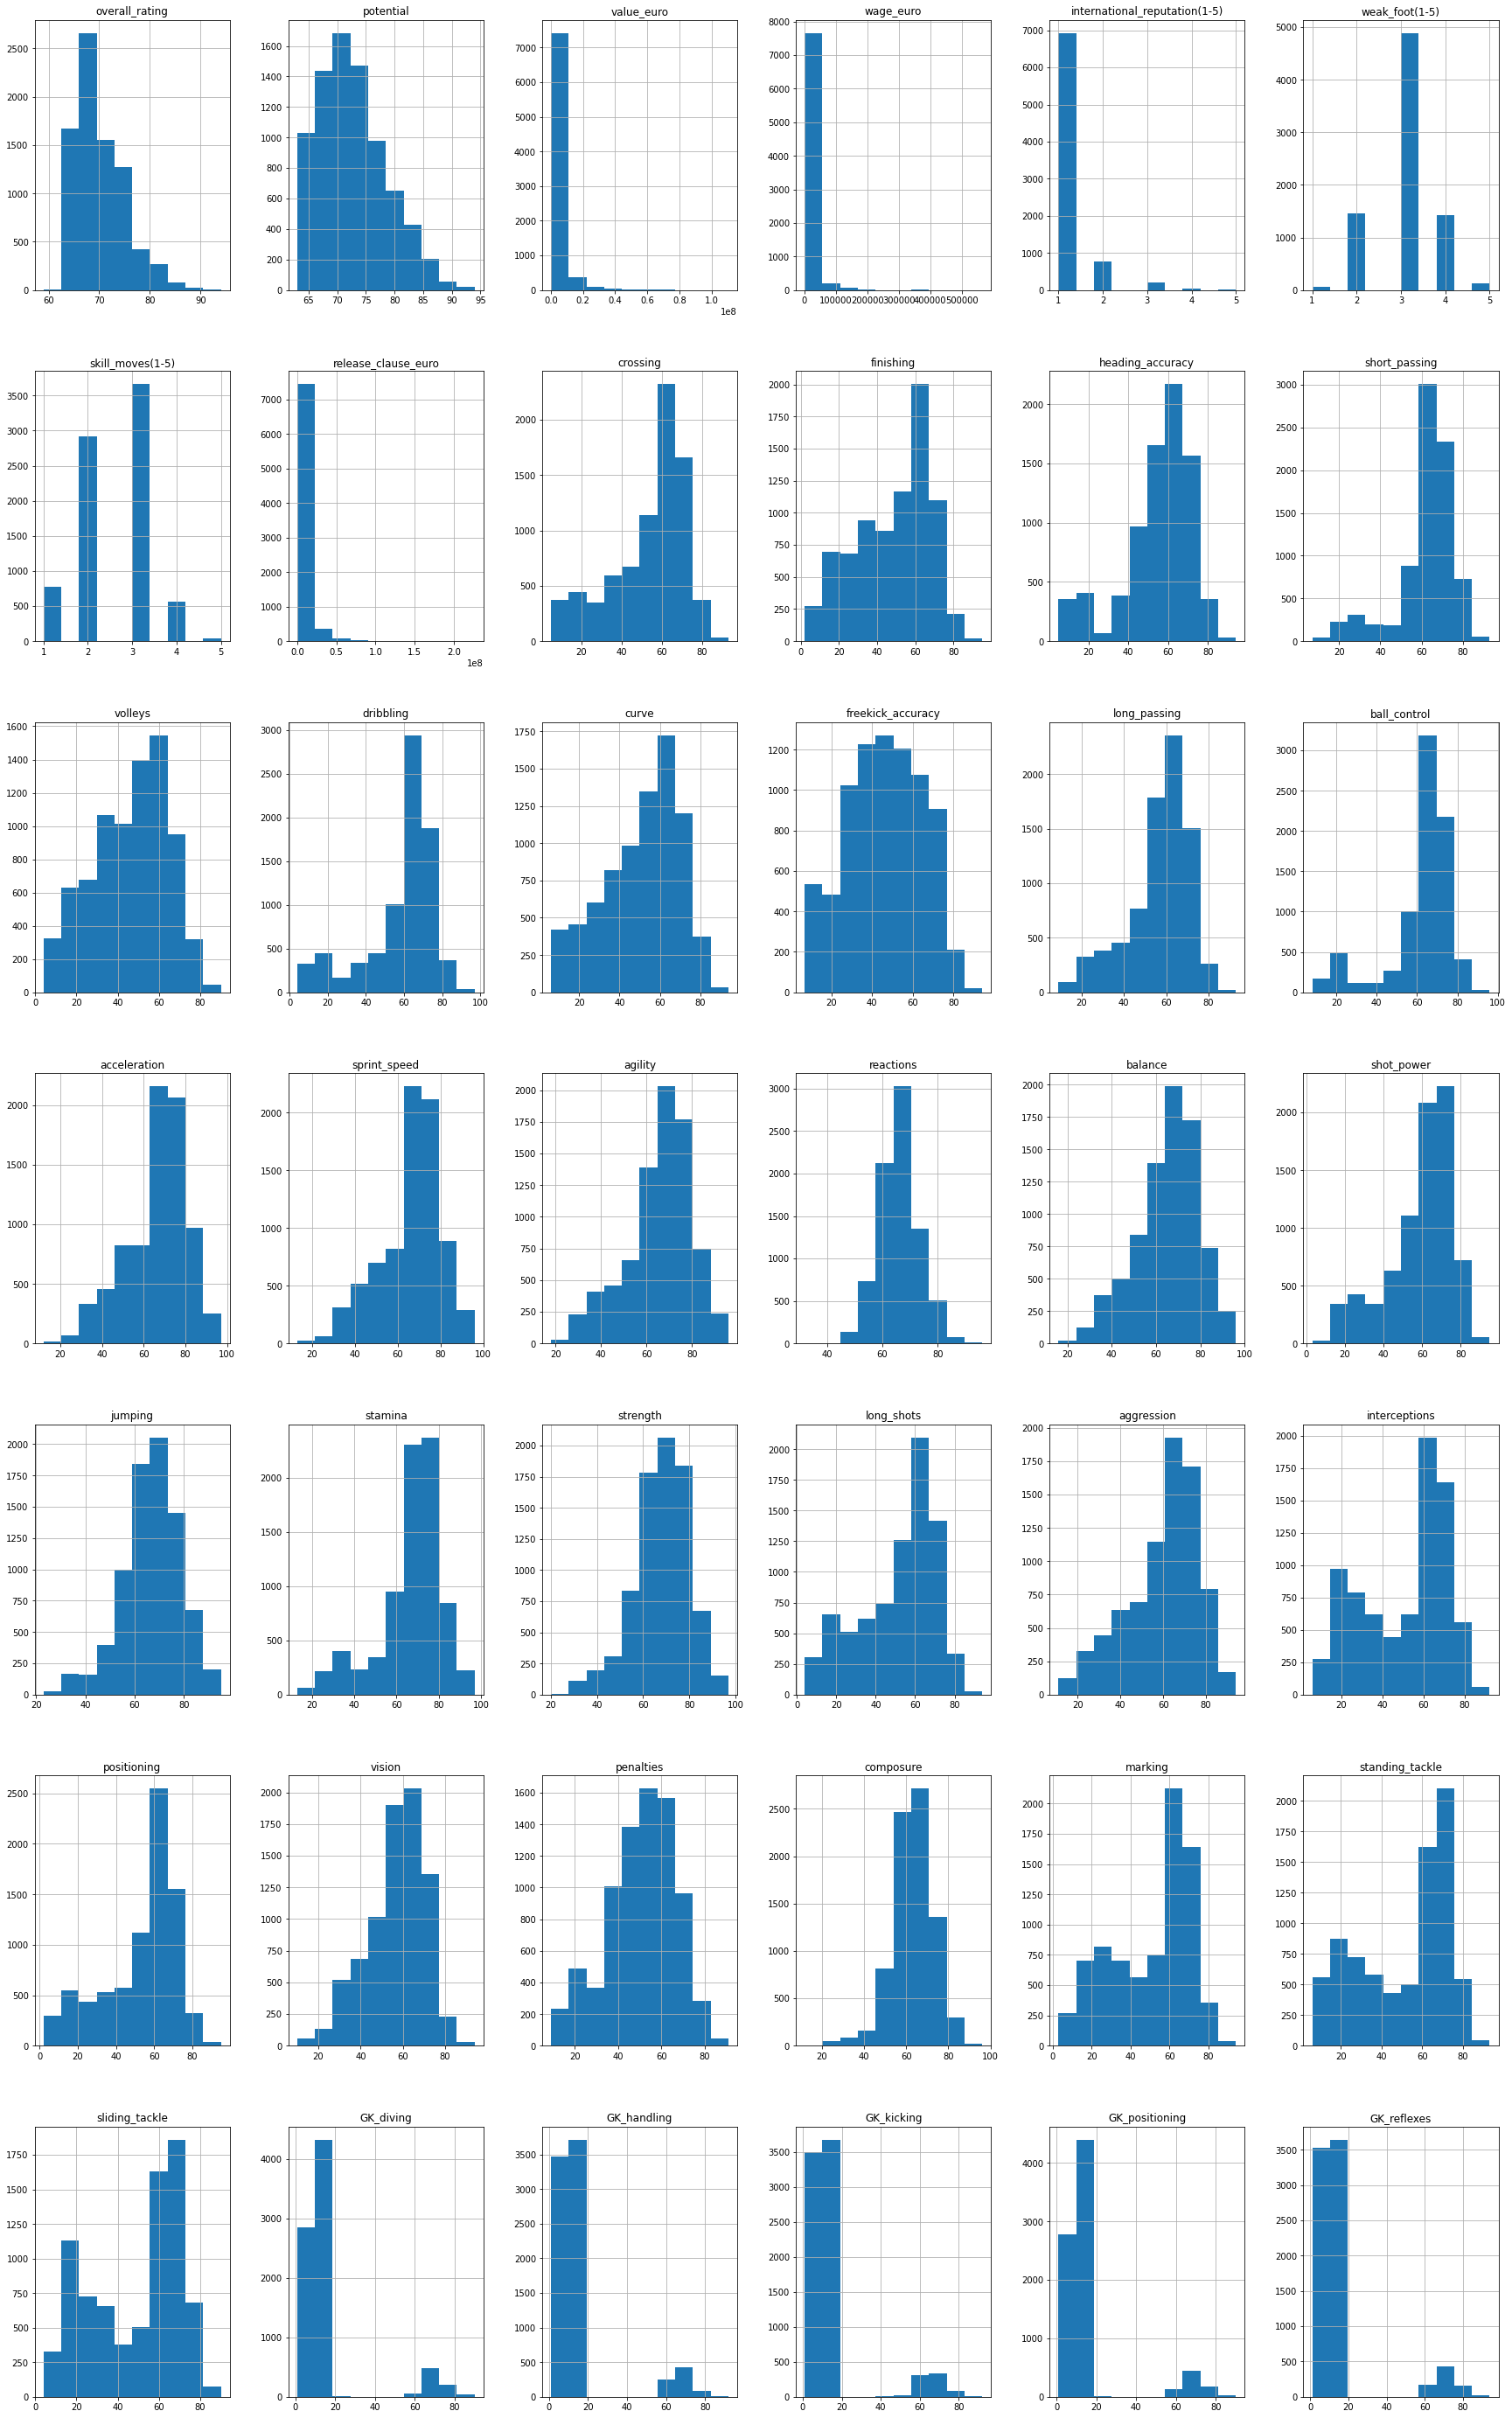

In [15]:
data.hist(figsize=(30, 50))

In [16]:
data.to_csv(cleanedfile, index=False)

## Exercise 1: Z-score Standardization and MinMax Scaling

In [17]:
inputfile = 'data/data_cleaned.csv'
outputfile_std = 'data/zscore_std_data.csv'
outputfile_minmax = 'data/minmax_data.csv'

In [18]:
data_raw = pd.read_csv(inputfile,header=0) #first row used as header
data_raw.head()

,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),release_clause_euro,crossing,finishing,...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
0,94,94,110500000.0,565000.0,5,4,4,226500000.0,86,95,...,75,96,33,28,26,6,11,15,14,8
1,88,89,69500000.0,205000.0,3,5,4,133800000.0,88,81,...,67,88,59,57,22,9,14,7,7,6
2,88,91,73000000.0,255000.0,4,4,5,144200000.0,80,75,...,82,87,63,67,67,5,6,2,4,3
3,88,88,62000000.0,165000.0,3,4,4,105400000.0,86,77,...,61,83,51,24,22,8,4,14,9,10
4,63,77,800000.0,3000.0,1,2,3,2100000.0,53,50,...,60,61,41,40,47,10,13,8,11,14


In [19]:
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

In [20]:
# data_std = (data_raw - data_raw.mean(axis = 0))/(data_raw.std(axis = 0)) # axis=0 for vertical agg functions
data_std = pd.DataFrame(scaler_std.fit_transform(data_raw.values), columns=data_raw.columns)
data_std.columns = [f'Z_{i}' for i in data_std.columns] # rename the headers after standardization

data_min_max = pd.DataFrame(scaler_minmax.fit_transform(data_raw.values), columns=[f'MinMax_{col}' for col in data_raw.columns])

In [21]:
data_std.head()

,Z_overall_rating,Z_potential,Z_value_euro,Z_wage_euro,Z_international_reputation(1-5),Z_weak_foot(1-5),Z_skill_moves(1-5),Z_release_clause_euro,Z_crossing,Z_finishing,...,Z_penalties,Z_composure,Z_marking,Z_standing_tackle,Z_sliding_tackle,Z_GK_diving,Z_GK_handling,Z_GK_kicking,Z_GK_positioning,Z_GK_reflexes
0,4.884196,3.726851,15.862628,20.768761,8.080029,1.455407,1.894900,16.875493,1.765133,2.382600,...,1.539685,3.359361,-0.884849,-1.061572,-1.052806,-0.579343,-0.305032,-0.064391,-0.133108,-0.466088
1,3.673033,2.844707,9.784511,7.216789,3.864661,2.935535,1.894900,9.763866,1.874225,1.666078,...,1.028609,2.541875,0.405918,0.261794,-1.236941,-0.413345,-0.131153,-0.541029,-0.530154,-0.574567
2,3.673033,3.197564,10.303374,9.099007,5.972345,1.455407,3.172228,10.561718,1.437857,1.358997,...,1.986876,2.439690,0.604498,0.718128,0.834580,-0.634676,-0.594830,-0.838929,-0.700316,-0.737286
3,3.673033,2.668278,8.672660,5.711014,3.864661,1.455407,1.894900,7.585114,1.765133,1.461357,...,0.645303,2.030947,0.008759,-1.244106,-1.236941,-0.468678,-0.710749,-0.123971,-0.416712,-0.357608
4,-1.373477,0.727561,-0.400043,-0.387373,-0.350707,-1.504850,0.617571,-0.339710,-0.034887,0.079492,...,0.581418,-0.217140,-0.487689,-0.513972,-0.086096,-0.358012,-0.189113,-0.481450,-0.303271,-0.140650


In [22]:
data_min_max.head()

,MinMax_overall_rating,MinMax_potential,MinMax_value_euro,MinMax_wage_euro,MinMax_international_reputation(1-5),MinMax_weak_foot(1-5),MinMax_skill_moves(1-5),MinMax_release_clause_euro,MinMax_crossing,MinMax_finishing,...,MinMax_penalties,MinMax_composure,MinMax_marking,MinMax_standing_tackle,MinMax_sliding_tackle,MinMax_GK_diving,MinMax_GK_handling,MinMax_GK_kicking,MinMax_GK_positioning,MinMax_GK_reflexes
0,1.000000,1.000000,1.000000,1.000000,1.00,0.75,0.75,1.000000,0.920455,1.000000,...,0.804878,1.000000,0.329670,0.252874,0.255814,0.056180,0.109890,0.153846,0.146067,0.075269
1,0.828571,0.838710,0.628892,0.361702,0.50,1.00,0.75,0.590660,0.943182,0.849462,...,0.707317,0.904762,0.615385,0.586207,0.209302,0.089888,0.142857,0.065934,0.067416,0.053763
2,0.828571,0.903226,0.660572,0.450355,0.75,0.75,1.00,0.636584,0.852273,0.784946,...,0.890244,0.892857,0.659341,0.701149,0.732558,0.044944,0.054945,0.010989,0.033708,0.021505
3,0.828571,0.806452,0.561007,0.290780,0.50,0.75,0.75,0.465252,0.920455,0.806452,...,0.634146,0.845238,0.527473,0.206897,0.209302,0.078652,0.032967,0.142857,0.089888,0.096774
4,0.114286,0.451613,0.007060,0.003546,0.00,0.25,0.50,0.009105,0.545455,0.516129,...,0.621951,0.583333,0.417582,0.390805,0.500000,0.101124,0.131868,0.076923,0.112360,0.139785


In [23]:
data_std.to_csv(outputfile_std,index=False) # output data to csv file

In [24]:
data_min_max.to_csv(outputfile_minmax,index=False) # output data to csv file

## Exercise 2: DBSCAN Clustering

https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80

In [25]:
file_prefix = 'dbscan_labeled'
inputfile = 'data/minmax_data.csv'
outputfile_labeled = f'data/{file_prefix}_minmax_data.csv'
outputfile_cluster_means = f'data/{file_prefix}_minmax_data_cluster_means.csv'


In [26]:
data_minmax = pd.read_csv(inputfile,header=0) #first row used as header
data_minmax.head()

,MinMax_overall_rating,MinMax_potential,MinMax_value_euro,MinMax_wage_euro,MinMax_international_reputation(1-5),MinMax_weak_foot(1-5),MinMax_skill_moves(1-5),MinMax_release_clause_euro,MinMax_crossing,MinMax_finishing,...,MinMax_penalties,MinMax_composure,MinMax_marking,MinMax_standing_tackle,MinMax_sliding_tackle,MinMax_GK_diving,MinMax_GK_handling,MinMax_GK_kicking,MinMax_GK_positioning,MinMax_GK_reflexes
0,1.000000,1.000000,1.000000,1.000000,1.00,0.75,0.75,1.000000,0.920455,1.000000,...,0.804878,1.000000,0.329670,0.252874,0.255814,0.056180,0.109890,0.153846,0.146067,0.075269
1,0.828571,0.838710,0.628892,0.361702,0.50,1.00,0.75,0.590660,0.943182,0.849462,...,0.707317,0.904762,0.615385,0.586207,0.209302,0.089888,0.142857,0.065934,0.067416,0.053763
2,0.828571,0.903226,0.660572,0.450355,0.75,0.75,1.00,0.636584,0.852273,0.784946,...,0.890244,0.892857,0.659341,0.701149,0.732558,0.044944,0.054945,0.010989,0.033708,0.021505
3,0.828571,0.806452,0.561007,0.290780,0.50,0.75,0.75,0.465252,0.920455,0.806452,...,0.634146,0.845238,0.527473,0.206897,0.209302,0.078652,0.032967,0.142857,0.089888,0.096774
4,0.114286,0.451613,0.007060,0.003546,0.00,0.25,0.50,0.009105,0.545455,0.516129,...,0.621951,0.583333,0.417582,0.390805,0.500000,0.101124,0.131868,0.076923,0.112360,0.139785


array([[<AxesSubplot:title={'center':'MinMax_overall_rating'}>,
        <AxesSubplot:title={'center':'MinMax_potential'}>,
        <AxesSubplot:title={'center':'MinMax_value_euro'}>,
        <AxesSubplot:title={'center':'MinMax_wage_euro'}>,
        <AxesSubplot:title={'center':'MinMax_international_reputation(1-5)'}>,
        <AxesSubplot:title={'center':'MinMax_weak_foot(1-5)'}>],
       [<AxesSubplot:title={'center':'MinMax_skill_moves(1-5)'}>,
        <AxesSubplot:title={'center':'MinMax_release_clause_euro'}>,
        <AxesSubplot:title={'center':'MinMax_crossing'}>,
        <AxesSubplot:title={'center':'MinMax_finishing'}>,
        <AxesSubplot:title={'center':'MinMax_heading_accuracy'}>,
        <AxesSubplot:title={'center':'MinMax_short_passing'}>],
       [<AxesSubplot:title={'center':'MinMax_volleys'}>,
        <AxesSubplot:title={'center':'MinMax_dribbling'}>,
        <AxesSubplot:title={'center':'MinMax_curve'}>,
        <AxesSubplot:title={'center':'MinMax_freekick_accurac

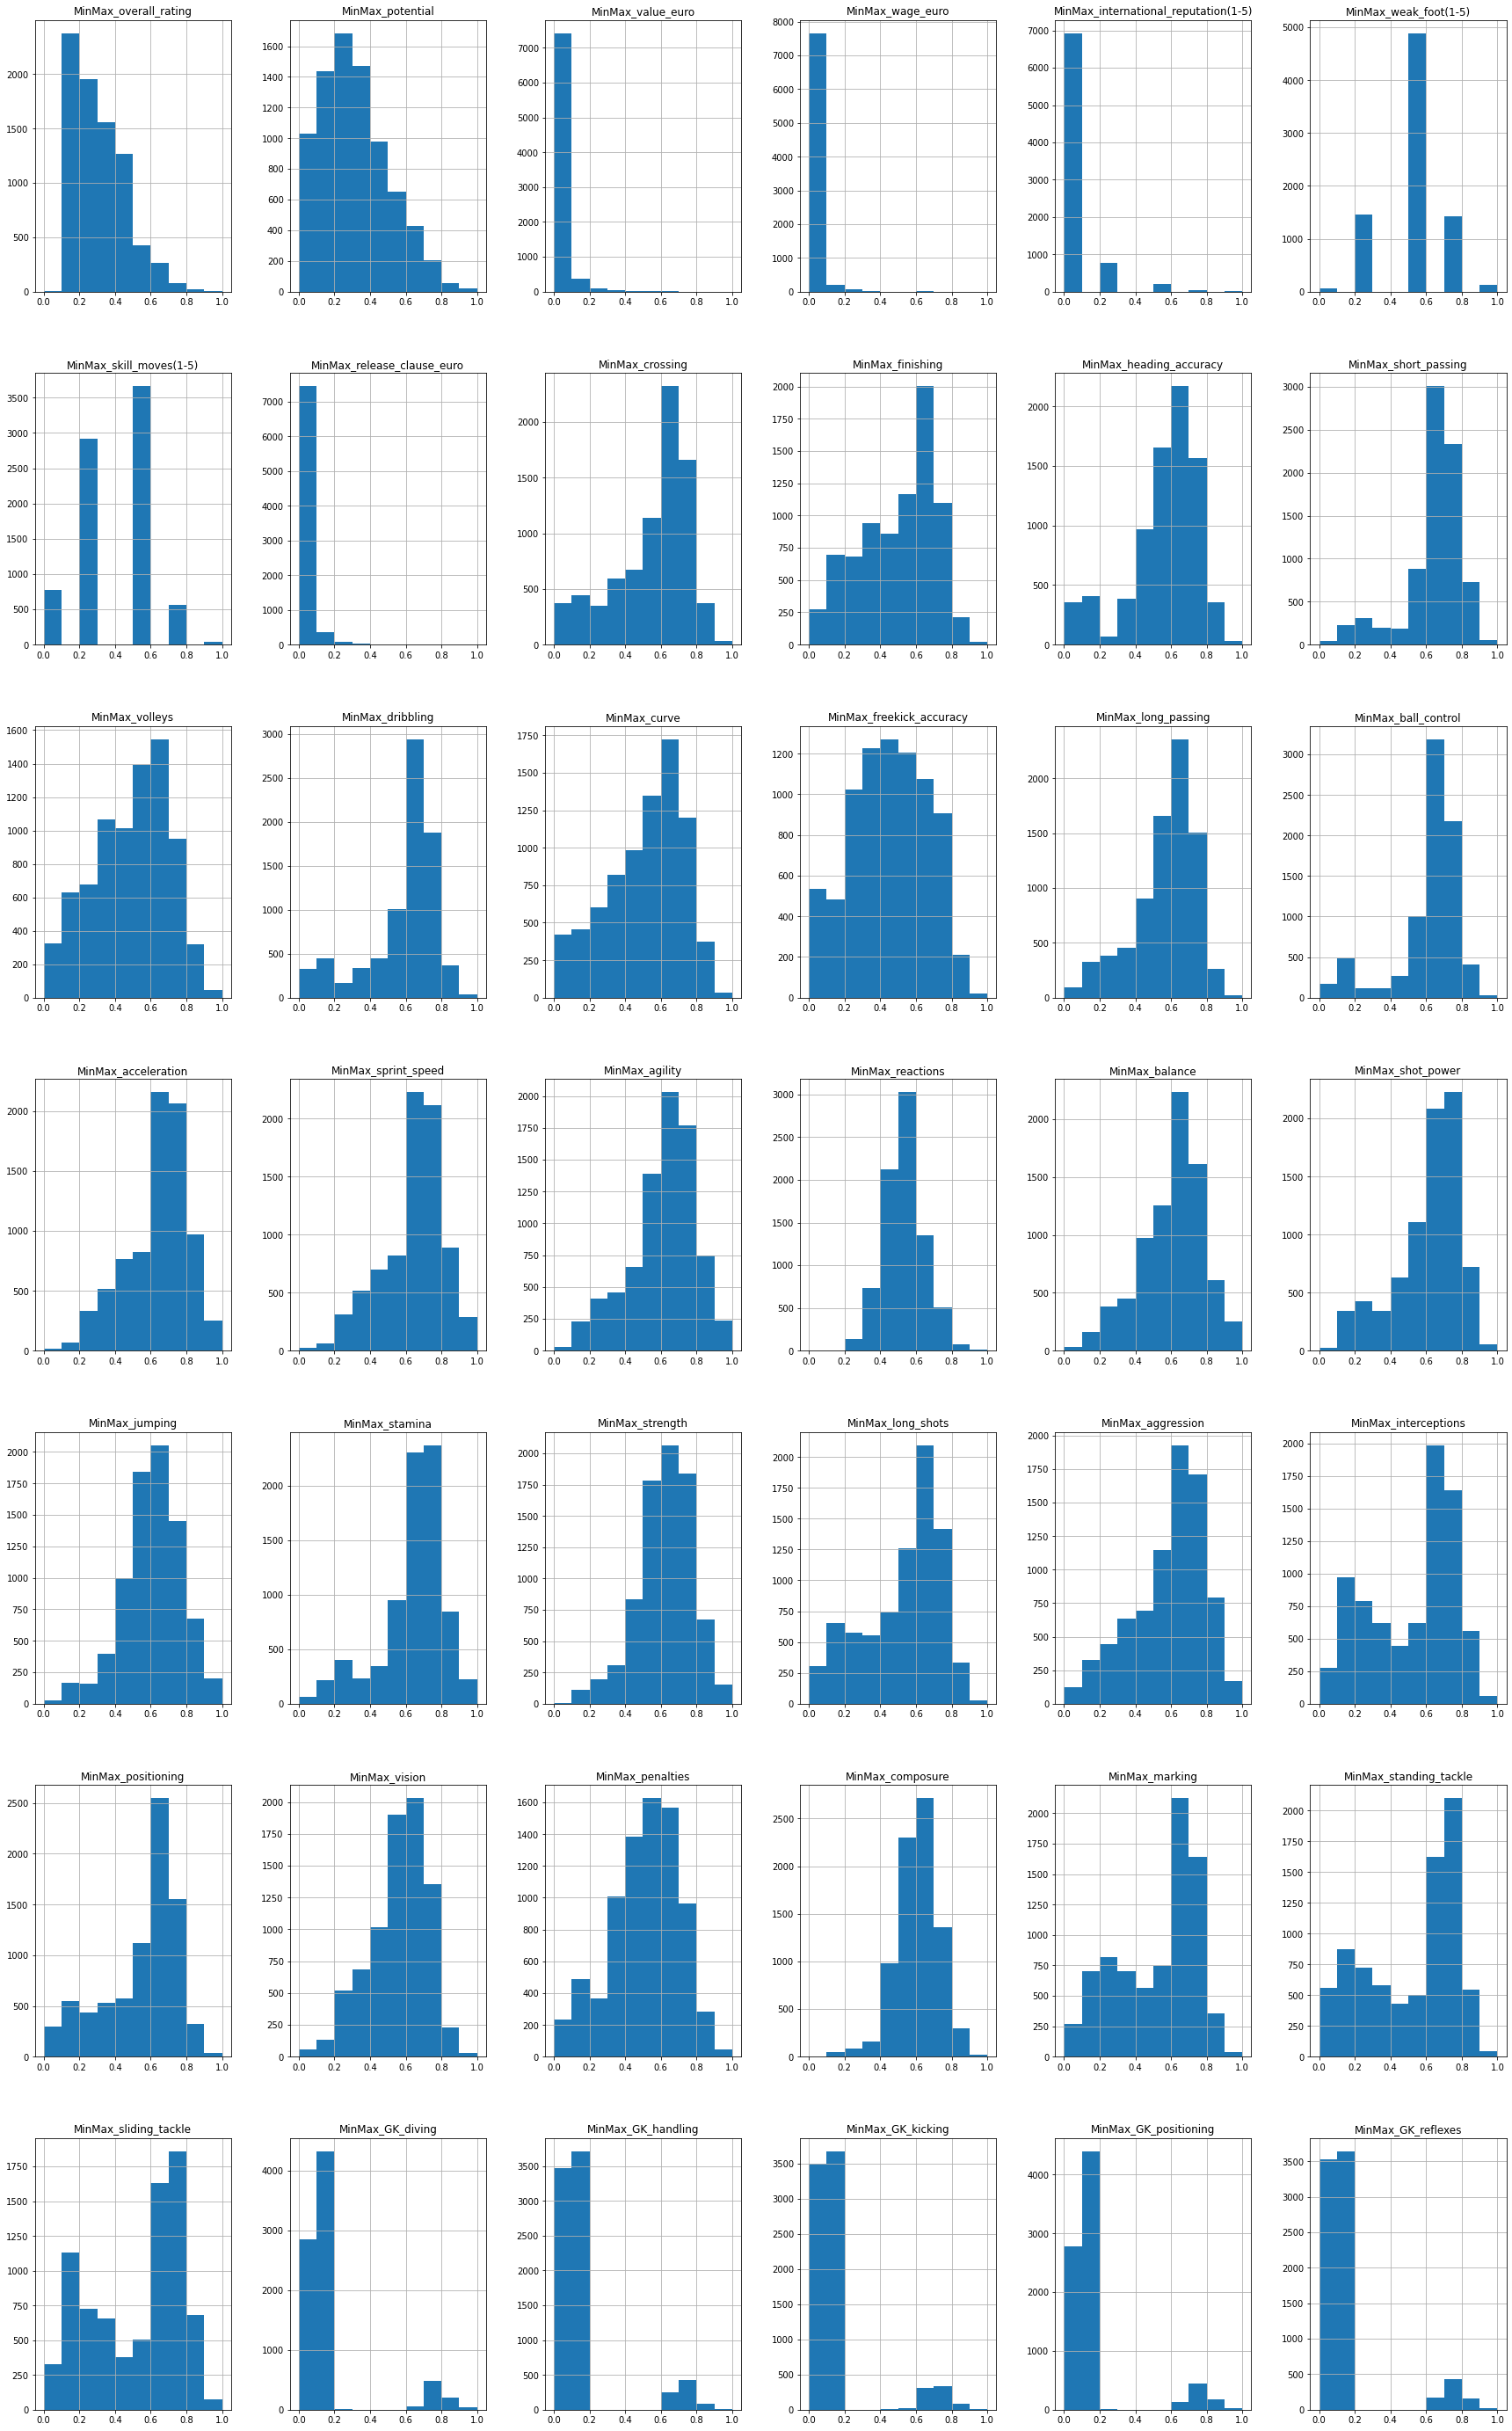

In [27]:
data_minmax.hist(figsize=(30, 50))

In [28]:
def calculate_silhouette_scores(x_scaled: np.ndarray, eps_range, minpts_range):
    """
    https://towardsdatascience.com/dbscan-clustering-algorithm-how-to-build-powerful-density-based-models-21d9961c4cec
    https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c"""
    # Create empty lists
    scores=[] # this is to store Silhouette scores
    comb=[] # this is to store combinations of epsilon / min_samples
    clasters=[]

    # Define ranges to explore
    # eps_range=range(6,12) # note, we will scale this down by 100 as we want to explore 0.06 - 0.11 range
    # minpts_range=range(3,8)

    for k in tqdm(eps_range):
        for j in tqdm(minpts_range, leave=False):
            # Set the model and its parameters
            model = DBSCAN(eps=k/100, min_samples=j)
            # Fit the model 
            clm = model.fit(x_scaled)
            labels = np.unique(clm.labels_).shape[0]
            # Calculate Silhoutte Score and append to a list
            if labels > 1:
                scores.append(silhouette_score(x_scaled, clm.labels_, metric='euclidean'))
            else:
                scores.append(-0.5)
            # print(f'{k} {j} {clm.labels_.shape} {np.unique(clm.labels_)}')
            comb.append(f'{k}|{j}') # axis values for the graph
            clasters.append(labels)
    return scores, comb, clasters

def plot_silhouette_scores(scores: List[float], comb: List[str], figsize=(16, 8)):
    # Plot the resulting Silhouette scores on a graph
    plt.figure(figsize=figsize, dpi=100)
    plt.plot(comb, scores, 'bo-', color='black')
    plt.xlabel('Epsilon/100 | MinPts')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score based on different combnation of Hyperparameters')
    plt.show()

In [29]:
scores, comb, cls_count = calculate_silhouette_scores(data_minmax, range(60, 101), [10, 100, 1000])

100%|██████████| 41/41 [03:04<00:00,  4.51s/it]


In [30]:
max(cls_count)

3

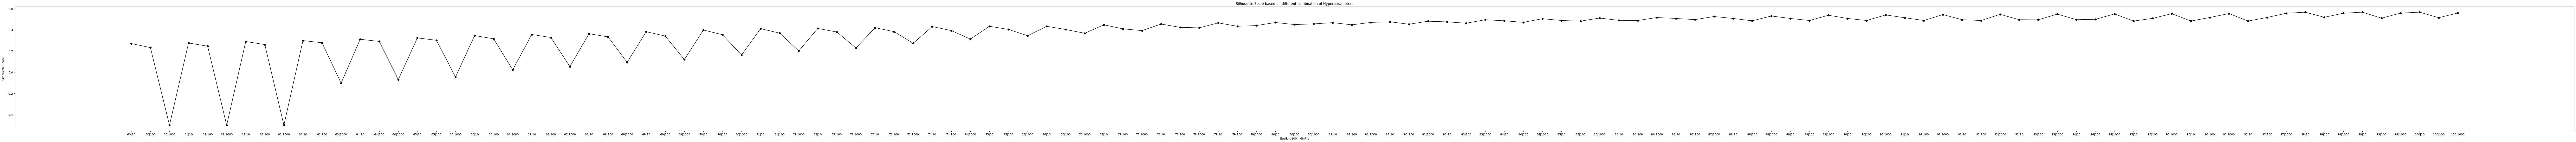

In [31]:
plot_silhouette_scores(scores, comb, figsize=(160, 8))

In [32]:
idx = scores.index(max(scores))
best_score=scores[idx]
best_comb=comb[idx]
best_score, best_comb

(0.5662968831426859, '98|10')

In [33]:
dbscan_model = DBSCAN(eps=0.98, min_samples=10)
dbscan_model.fit(data_minmax)
dbscan_model.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [34]:
silhouette_score(data_minmax.values[:, :-1], dbscan_model.labels_)

0.5537538930234753

In [35]:
dbscan_model.labels_.shape

(7963,)

In [36]:
pd.Series(dbscan_model.labels_).value_counts() # cluster count

0    7182
1     781
dtype: int64

In [37]:
dbscan_model.components_.shape

(7952, 42)

In [38]:
df_labeled_minmax = data_minmax.copy()
df_labeled_minmax['cluster'] = dbscan_model.labels_

In [39]:
df_labeled_minmax.to_csv(outputfile_labeled,index=False) # output data to csv file

In [40]:
clusters = df_labeled_minmax['cluster'].value_counts().index

In [41]:
means = [df_labeled_minmax[df_labeled_minmax['cluster'] == cluster].mean().values[:-1] for cluster in clusters]

In [42]:
df_cluster_means = pd.DataFrame(means, columns=df_labeled_minmax.columns[:-1])
df_cluster_means.head()

,MinMax_overall_rating,MinMax_potential,MinMax_value_euro,MinMax_wage_euro,MinMax_international_reputation(1-5),MinMax_weak_foot(1-5),MinMax_skill_moves(1-5),MinMax_release_clause_euro,MinMax_crossing,MinMax_finishing,...,MinMax_penalties,MinMax_composure,MinMax_marking,MinMax_standing_tackle,MinMax_sliding_tackle,MinMax_GK_diving,MinMax_GK_handling,MinMax_GK_kicking,MinMax_GK_positioning,MinMax_GK_reflexes
0,0.308489,0.319549,0.032170,0.022290,0.041632,0.517370,0.420356,0.029286,0.601015,0.541037,...,0.550282,0.626366,0.567118,0.566374,0.565545,0.108093,0.106455,0.106301,0.108403,0.103486
1,0.310518,0.309735,0.025185,0.017206,0.041293,0.382843,0.000000,0.022887,0.108631,0.116793,...,0.149386,0.445537,0.143124,0.096251,0.118989,0.778259,0.731142,0.712161,0.761268,0.757879


In [43]:
df_cluster_means.to_csv(outputfile_cluster_means,index=False) # output data to csv file

## Some draw functions

In [44]:
def get_cmap(n, name='hsv') -> Callable:
    '''
    https://stackoverflow.com/questions/14720331/how-to-generate-random-colors-in-matplotlib
    Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [45]:
class RainbowColorMap:
    colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'violet']
    def __call__(self, idx: int) -> str:
        return self.colors[idx]


def get_pallet(n, name='hsv'):
    if n > 7:
        return get_cmap(n, name)
    return RainbowColorMap()

In [46]:
def plot_radar_chart(claster_centers: pd.DataFrame, text: str):
    cmap: Callable = get_pallet(len(claster_centers))
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, polar=True)
    # ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5))
    ax.set_thetagrids(angles * 180/np.pi, claster_centers.columns)
    cluster_labels = [f'Cluster {i}' for i in claster_centers.index.tolist()]
    ax.grid(True)
    plot_data = claster_centers.values
    for i in range(len(plot_data)):
        ax.plot(angles, plot_data[i], 'o-', color=cmap(i),
                label=f'cluster {i}', linewidth=2)

    ax.legend(cluster_labels, loc=(0.9, .95),
                                labelspacing=0.1, fontsize='large')
    fig.text(0.5, 0.965, text,
                horizontalalignment='center', color='black', weight='bold',
                size='large')
    plt.show()

## Exercise 4: Cluster plot (radar chart) for DBSCAN

In [47]:
file_prefix = 'dbscan_labeled'
# inputfile_labeled = f'data/{file_prefix}_zscore_std_data.csv'
# inputfile_cluster_centers = f'data/{file_prefix}_zscore_std_cluster_centers.csv'
inputfile_labeled = f'data/{file_prefix}_minmax_data.csv'
input_cluster_means = f'data/{file_prefix}_minmax_data_cluster_means.csv'

In [48]:
data_minmax = pd.read_csv(inputfile_labeled, header=0)
cluster_means = pd.read_csv(input_cluster_means, header=0)

In [49]:
data_minmax.head()

,MinMax_overall_rating,MinMax_potential,MinMax_value_euro,MinMax_wage_euro,MinMax_international_reputation(1-5),MinMax_weak_foot(1-5),MinMax_skill_moves(1-5),MinMax_release_clause_euro,MinMax_crossing,MinMax_finishing,...,MinMax_composure,MinMax_marking,MinMax_standing_tackle,MinMax_sliding_tackle,MinMax_GK_diving,MinMax_GK_handling,MinMax_GK_kicking,MinMax_GK_positioning,MinMax_GK_reflexes,cluster
0,1.000000,1.000000,1.000000,1.000000,1.00,0.75,0.75,1.000000,0.920455,1.000000,...,1.000000,0.329670,0.252874,0.255814,0.056180,0.109890,0.153846,0.146067,0.075269,0
1,0.828571,0.838710,0.628892,0.361702,0.50,1.00,0.75,0.590660,0.943182,0.849462,...,0.904762,0.615385,0.586207,0.209302,0.089888,0.142857,0.065934,0.067416,0.053763,0
2,0.828571,0.903226,0.660572,0.450355,0.75,0.75,1.00,0.636584,0.852273,0.784946,...,0.892857,0.659341,0.701149,0.732558,0.044944,0.054945,0.010989,0.033708,0.021505,0
3,0.828571,0.806452,0.561007,0.290780,0.50,0.75,0.75,0.465252,0.920455,0.806452,...,0.845238,0.527473,0.206897,0.209302,0.078652,0.032967,0.142857,0.089888,0.096774,0
4,0.114286,0.451613,0.007060,0.003546,0.00,0.25,0.50,0.009105,0.545455,0.516129,...,0.583333,0.417582,0.390805,0.500000,0.101124,0.131868,0.076923,0.112360,0.139785,0


In [50]:
cluster_means.head()

,MinMax_overall_rating,MinMax_potential,MinMax_value_euro,MinMax_wage_euro,MinMax_international_reputation(1-5),MinMax_weak_foot(1-5),MinMax_skill_moves(1-5),MinMax_release_clause_euro,MinMax_crossing,MinMax_finishing,...,MinMax_penalties,MinMax_composure,MinMax_marking,MinMax_standing_tackle,MinMax_sliding_tackle,MinMax_GK_diving,MinMax_GK_handling,MinMax_GK_kicking,MinMax_GK_positioning,MinMax_GK_reflexes
0,0.308489,0.319549,0.032170,0.022290,0.041632,0.517370,0.420356,0.029286,0.601015,0.541037,...,0.550282,0.626366,0.567118,0.566374,0.565545,0.108093,0.106455,0.106301,0.108403,0.103486
1,0.310518,0.309735,0.025185,0.017206,0.041293,0.382843,0.000000,0.022887,0.108631,0.116793,...,0.149386,0.445537,0.143124,0.096251,0.118989,0.778259,0.731142,0.712161,0.761268,0.757879


In [51]:
labels = data_minmax.columns[:-1]
k = len(cluster_means)
plot_data = cluster_means.values
# color = ['b', 'g', 'r', 'c', 'y'] 

In [52]:
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# angles = np.concatenate((angles, [angles[0]]))
# plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1)

In [53]:
angles.shape

(42,)

In [54]:
plot_data.shape

(2, 42)

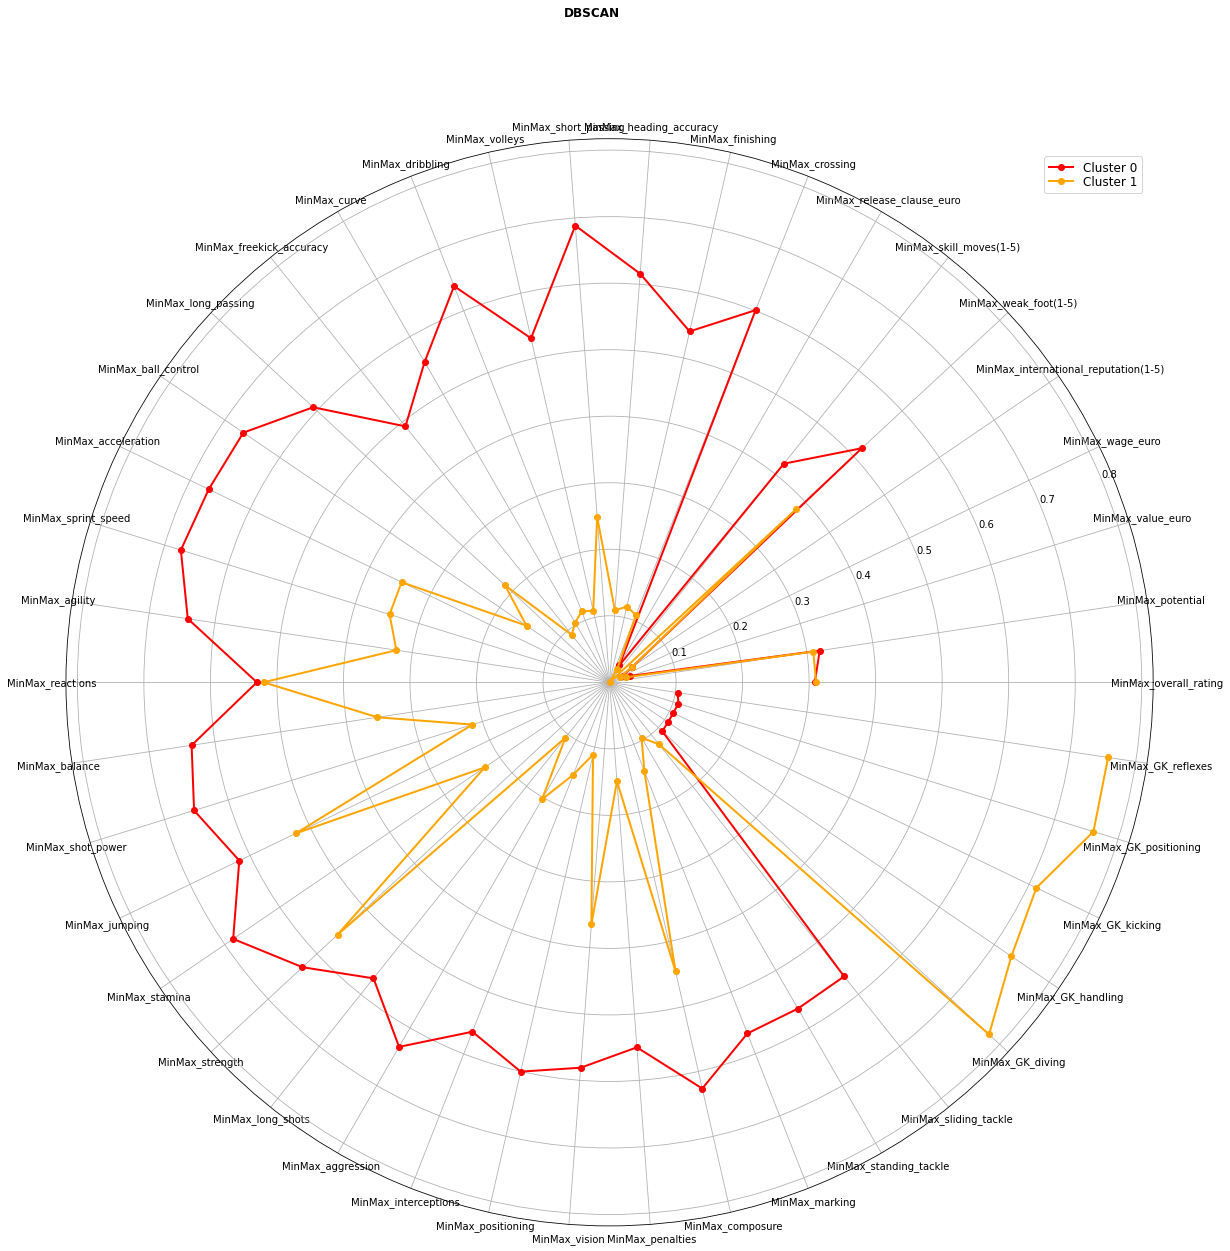

In [55]:
plot_radar_chart(cluster_means, "DBSCAN")

<AxesSubplot:>

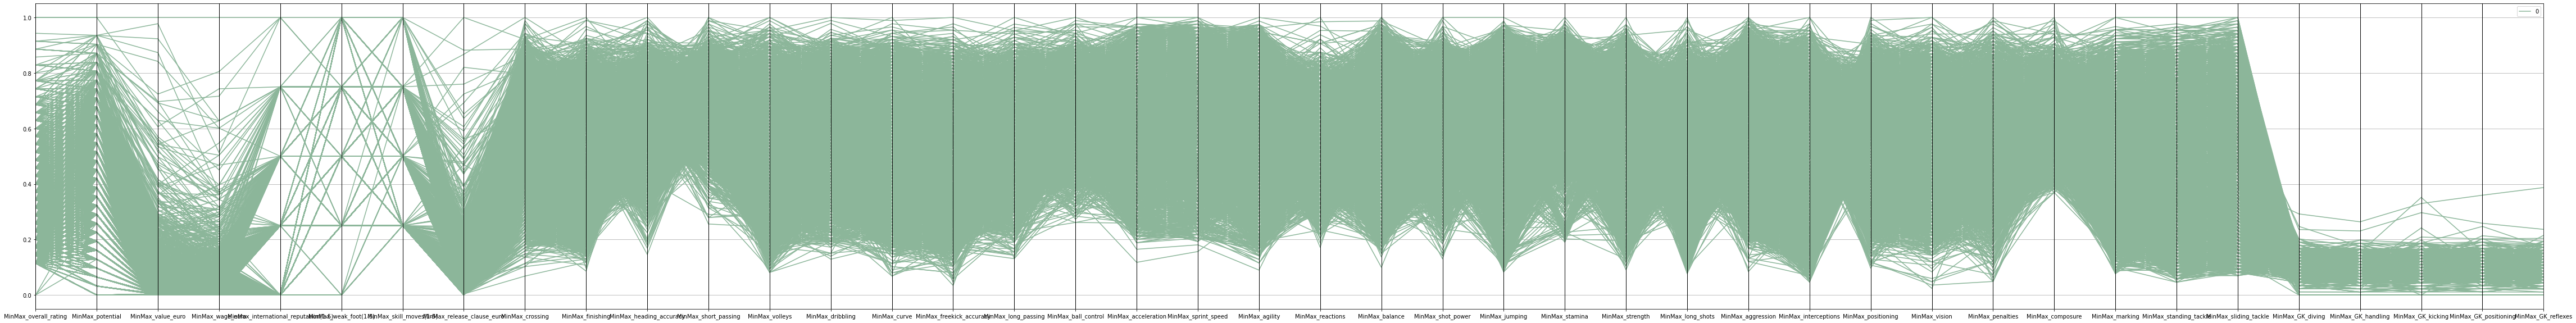

In [56]:
fig = plt.figure(figsize=(80, 10))
ax = fig.add_subplot(111)
parallel_coordinates(data_minmax[data_minmax['cluster'] == 0], 'cluster', ax=ax)

<AxesSubplot:>

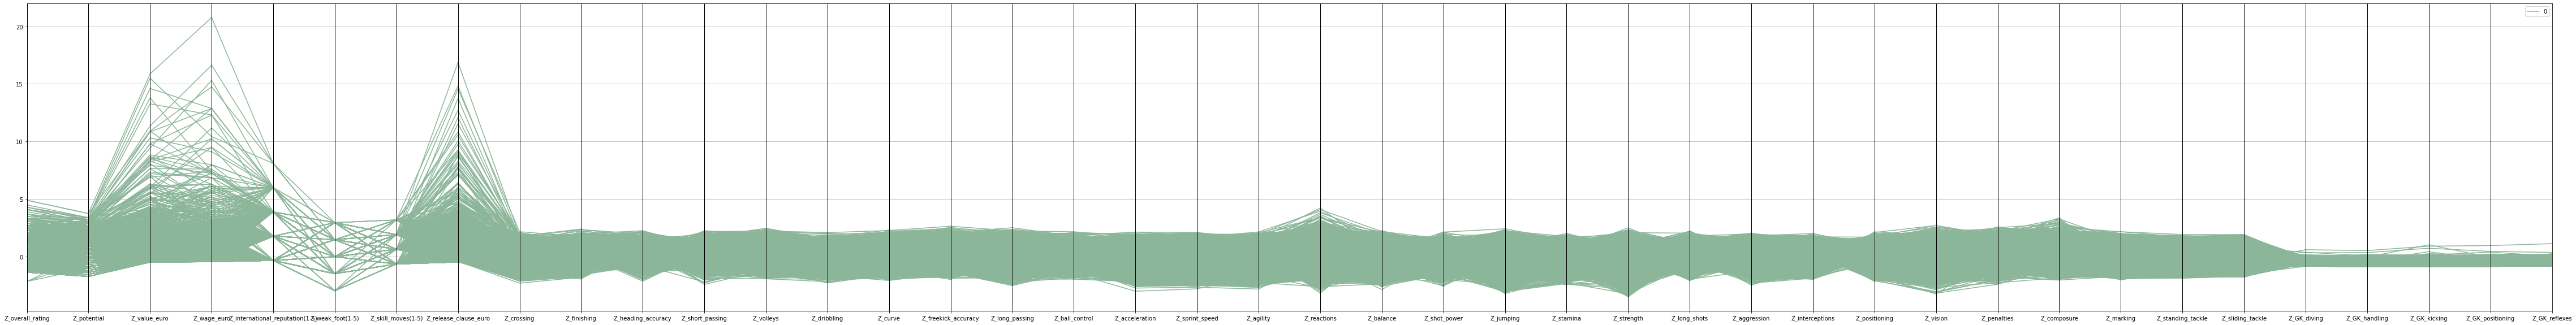

In [57]:
data_labeled = data_std.copy()
data_labeled['cluster'] = data_minmax['cluster']
fig = plt.figure(figsize=(80, 10))
ax = fig.add_subplot(111)
parallel_coordinates(data_labeled[data_labeled['cluster'] == 0], 'cluster', ax=ax)